In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [30]:
# physical constants (they don't change)
k_T = 2.1 # thermal ???
rho = 917 # density of ice
c_i = 2000 # heat capacity of ice
alpha = k_T/(rho * c_i) # ???
# model domain
t_max = 100*356*86400 # [s] maximum time to run the model
depth_max = 155 # [m] maximum depth to model
dx = 5.# [m] spatial resolution
# calculate suitable time step width
dt = (dx ** 2)/(4 * alpha) # time step width
max_iter_time = int(t_max/dt) # number of timesteps
gamma = (alpha * dt) / (dx ** 2)

In [31]:
u = np.zeros((int(depth_max/dx), max_iter_time)).T
T_surf = np.random.rand(max_iter_time)
# forward model
def calc_T(u, T_surf):
    nk, ni = u.shape
    for k in range(0, nk-1):
        A = u[k, 2:]
        B = u[k,  :-2]
        E = u[k, 1:-1]
        result = gamma * (A+B-2*E) + E

        # set the newly computed heatmap at time k+1
        u[k+1, 1:-1] = result

        # geothermal heat flux
        # u[k+1,-1] = u[k+1,-2] + q * delta_x / k_T

        # temperature forcing at surface
        u[k+1,0] = T_surf[k]

        # seasonal temperature variations (put in correct weather data)
        # u[k+1,0] = 10 * np.sin(2*np.pi/86400/365*delta_t*k) - 20
    return u

u3 = calc_T(u, T_surf)

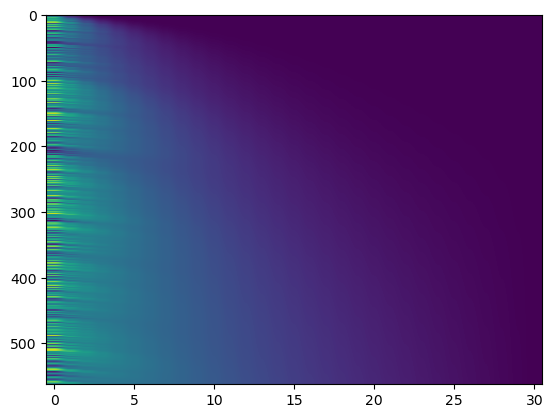

In [32]:
fig = plt.figure()
plt.imshow(u3, aspect='auto', vmin=0, vmax=1)